# Task
perform data analysis
look for missing values
outliers
duplicates
handle missing vlaues, outliers,and duplicates
Univariate Analysis
Bivariate Analysis
 Multivariate Analysis
encode categorical data
standardise and normalise datta

Here is all the data you need:
"cubic_zirconia.csv"

## Data loading

### Subtask:
Load the dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/EDA/cubic_zirconia.csv')
display(df.head())
print(df.shape)

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779

(26967, 11)


In [ ]:
#find duplicates
df.duplicated().sum()

np.int64(0)

**Reasoning**:
Load the dataset and display its first few rows and shape to get a preliminary understanding of the data.



In [ ]:
#drop column Unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True) #chnages are permanent
df

carat        cut color clarity  depth  table     x     y     z  price
0       0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1       0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2       0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3       0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4       0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
26962   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

[26967 rows x 10 columns]

In [ ]:
print(df.head(5))
print("--------------------")
df.info() #overview of data


   carat        cut color clarity  depth  table     x     y     z  price
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    

**Reasoning**:
The dataset is loaded successfully. Now, I need to proceed with the next steps in the original request, which is to look for missing values, outliers and duplicates.



In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
#print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check for outliers (using IQR method for numerical continous features)
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in {col}: {len(outliers)}")
    # Display a few outlier examples
    display(outliers[[col]].head())

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Number of outliers in carat: 662


carat
79    2.16
124   2.80
135   2.20
263   2.11
281   2.11


Number of outliers in depth: 1225


depth
14    66.2
50    58.0
58    64.9
73    58.4
100   66.8


Number of outliers in table: 318


table
8     64.0
18    64.0
162   64.0
248   64.0
290   65.0


Number of outliers in x: 15


x
3025  10.02
5821   0.00
6215   0.00
8156  10.01
8573   9.65


Number of outliers in y: 15


y
3025  9.94
5821  0.00
6215  0.00
8156  9.94
8573  9.59


Number of outliers in z: 23


z
344   31.80
1072   5.90
3025   6.24
5821   0.00
6034   0.00


Number of outliers in price: 1779


price
44   12554
62   17273
102  16789
122  12681
124  15030

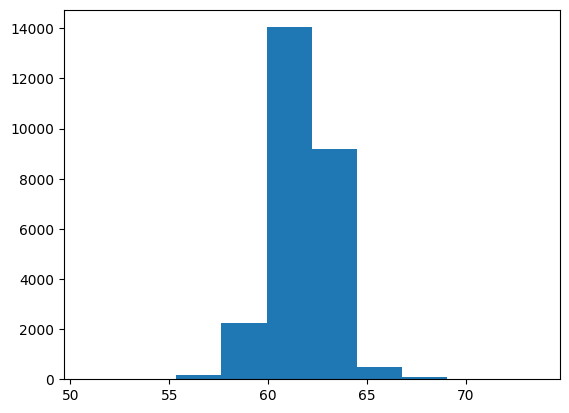

In [ ]:
#historgram for depth column
import matplotlib.pyplot as plt
plt.hist(df['depth'])
plt.show()

**Reasoning**:
I have identified missing values, duplicates, and outliers.  The next step is to handle them, according to the instructions.



In [ ]:
# Handling missing values in 'depth' by imputation with the median
df['depth'].fillna(df['depth'].median(), inplace=True)

# No duplicates found, so no action needed

# Handling outliers:  Instead of removing them, I will cap them at the upper and lower bounds.
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

<ipython-input-11-6a11d187527e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth'].fillna(df['depth'].median(), inplace=True)


**Reasoning**:
The previous code had a warning about chained assignment. I will correct the code to avoid the warning and then proceed.



In [ ]:
# Handling missing values in 'depth' by imputation with the median
df['depth'] = df['depth'].fillna(df['depth'].median())

# No duplicates found, so no action needed

# Handling outliers:  Instead of removing them, I will cap them at the upper and lower bounds.
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

**Reasoning**:
The data cleaning is done.  The next step is to perform univariate analysis.



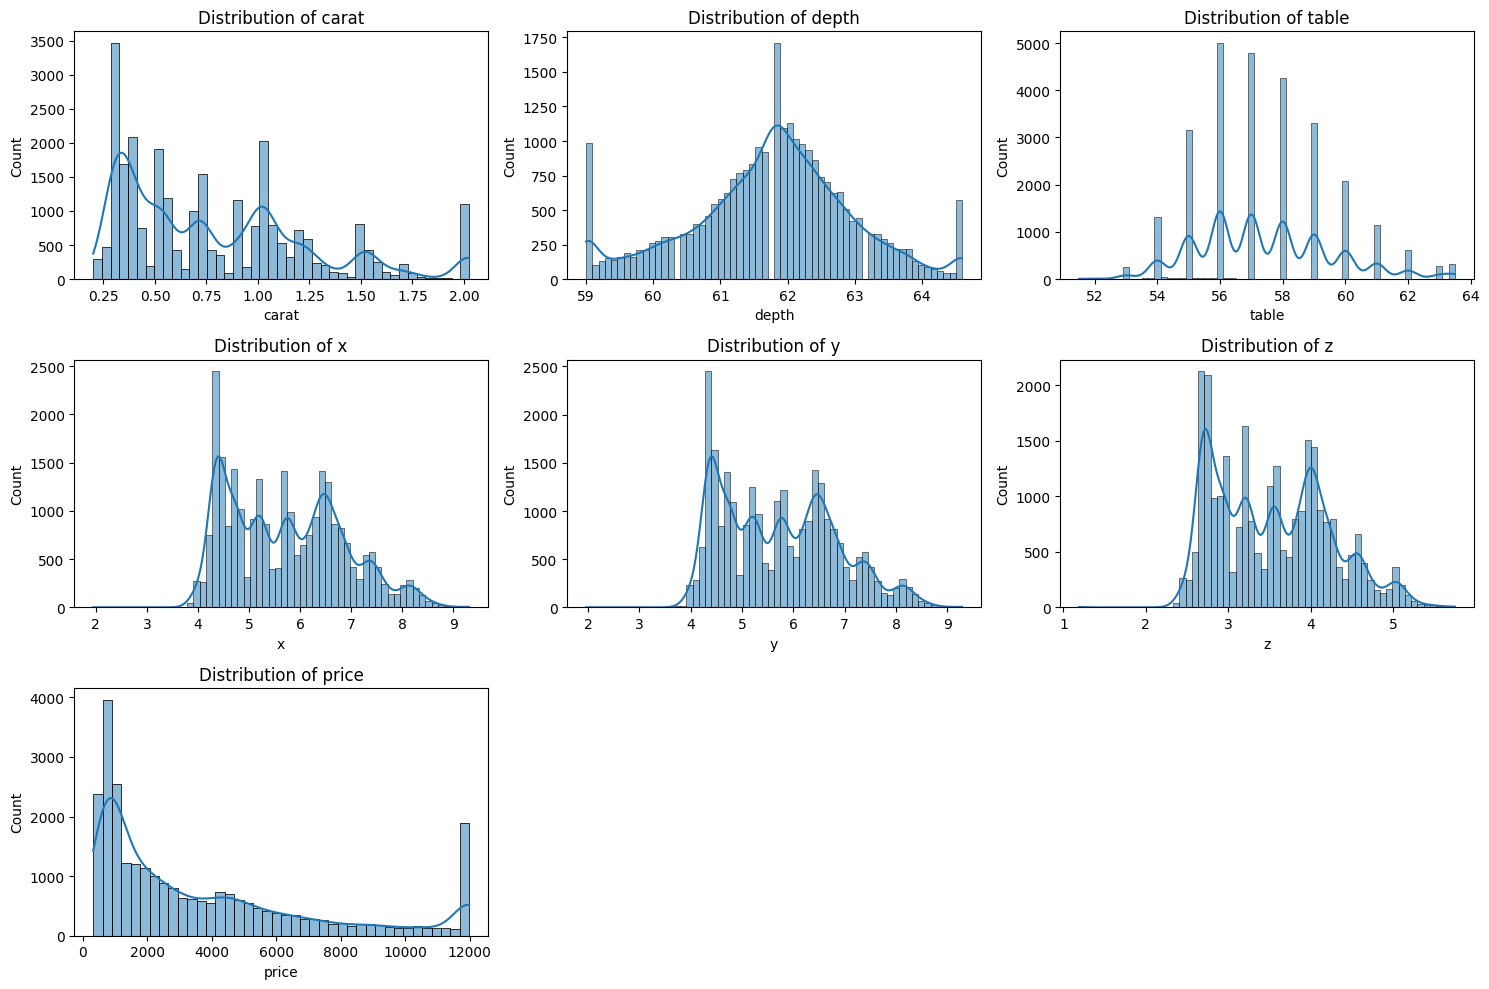

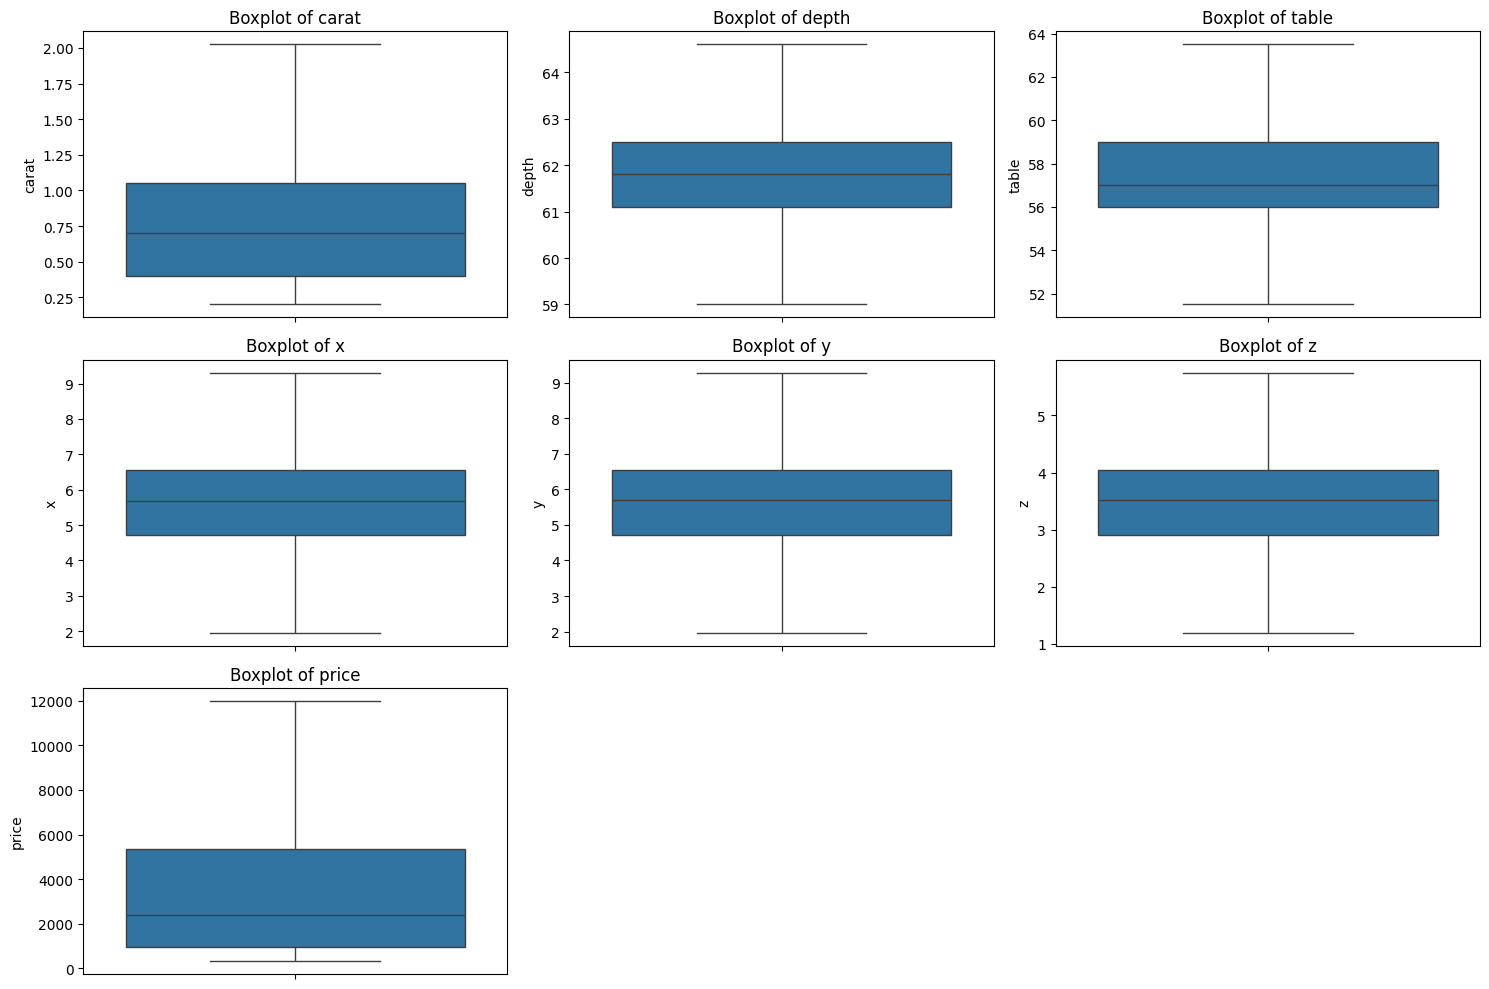

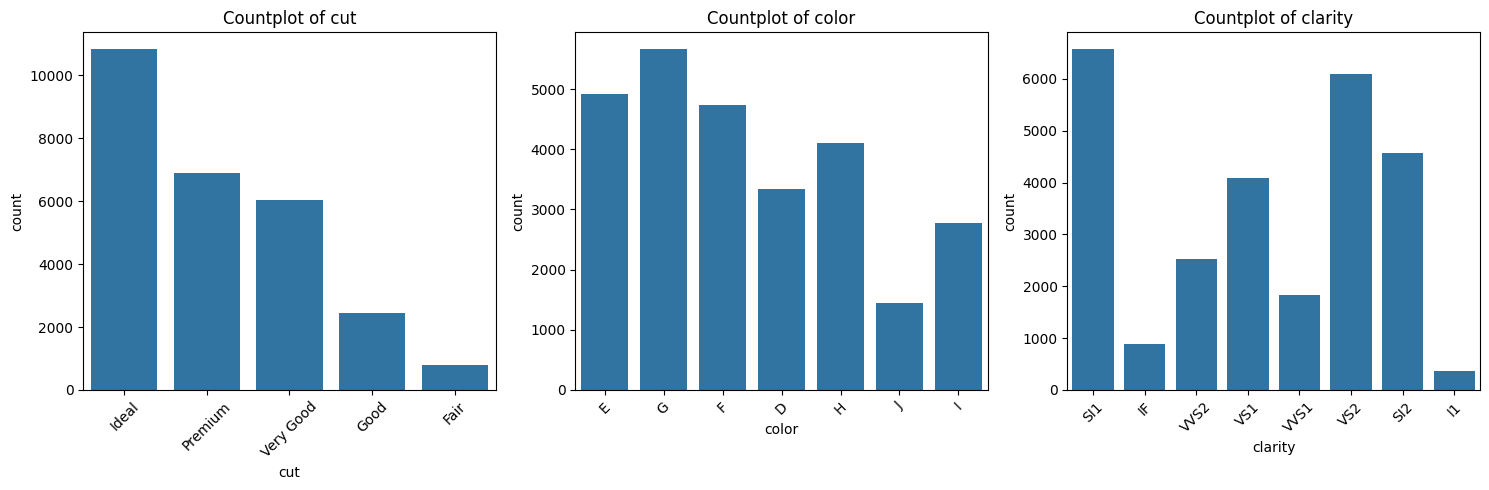

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Boxplots for numerical features to visualize the distribution of the data.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Countplots for categorical features
plt.figure(figsize=(15, 5))
categorical_cols = ['cut', 'color', 'clarity']
for i, col in enumerate(categorical_cols):
  plt.subplot(1,3,i+1)
  sns.countplot(x=df[col])
  plt.xticks(rotation=45)
  plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

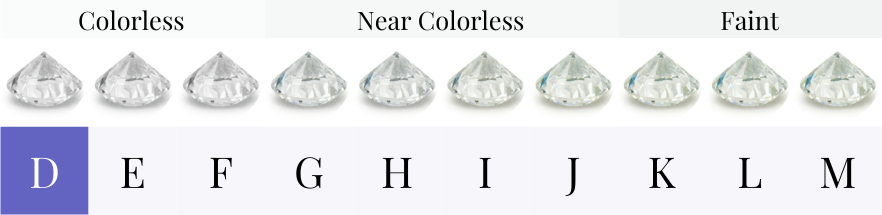

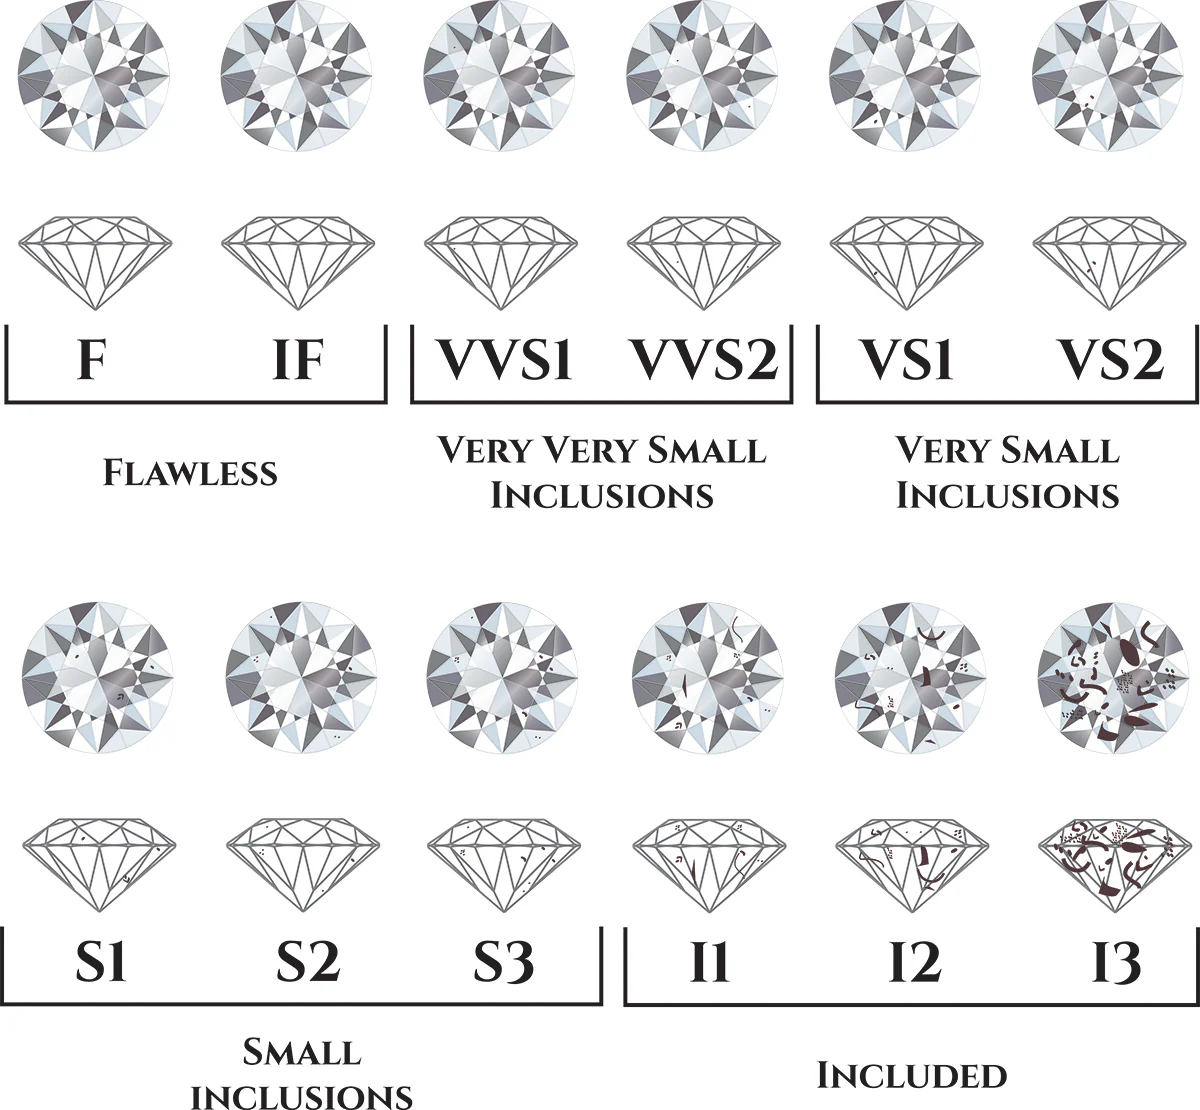

**Reasoning**:
Univariate analysis is done. The next step is to perform bivariate analysis.



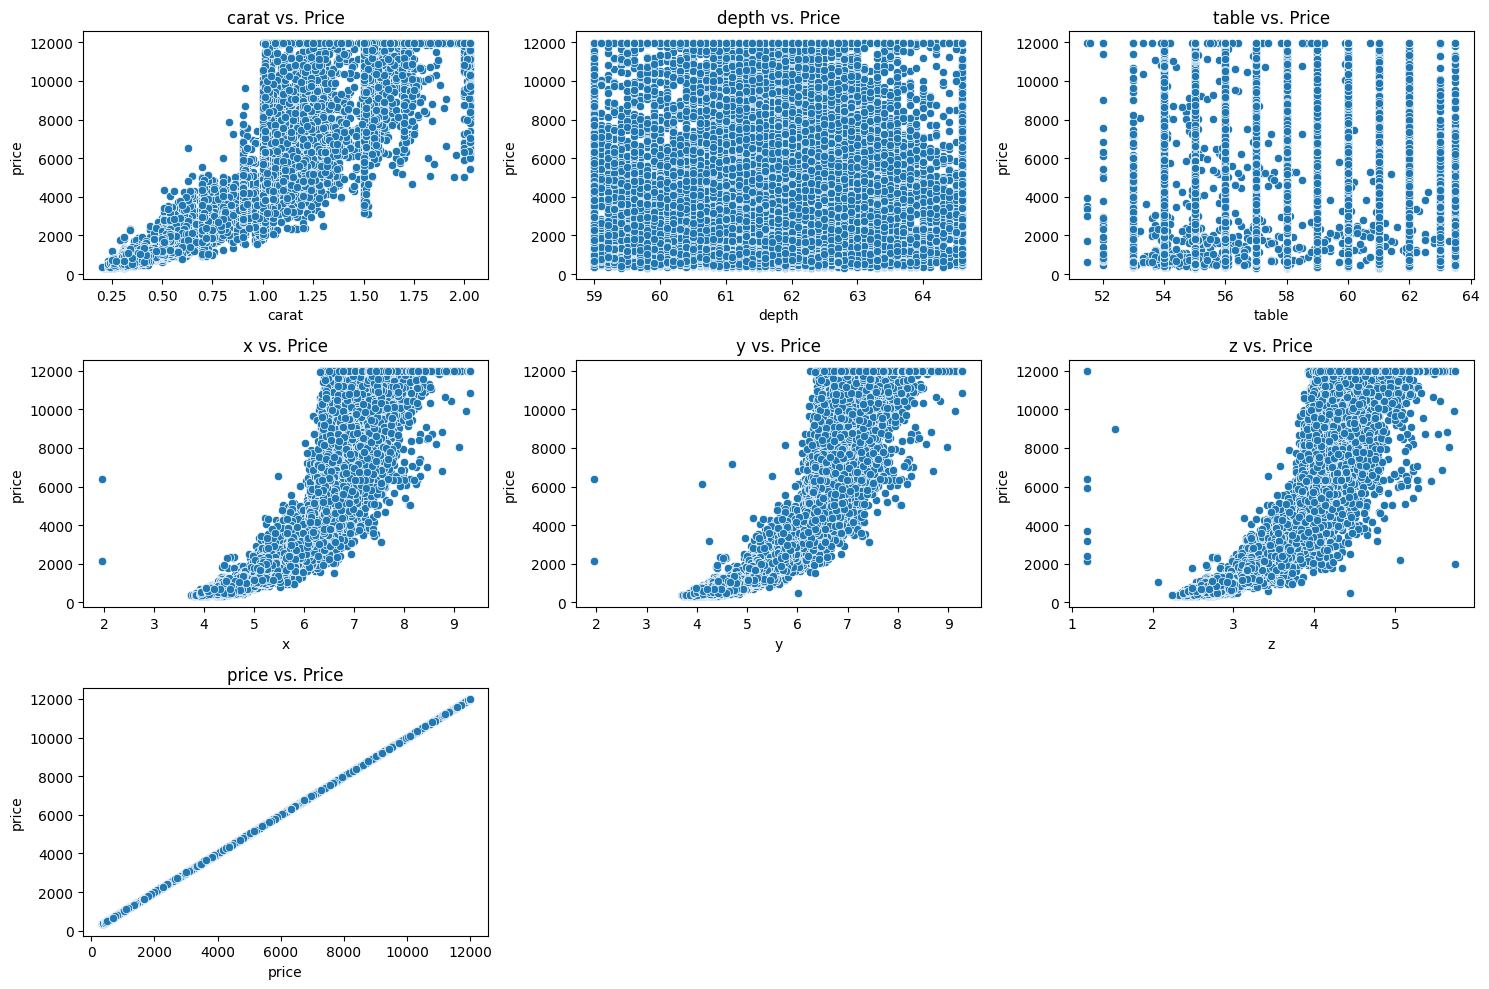

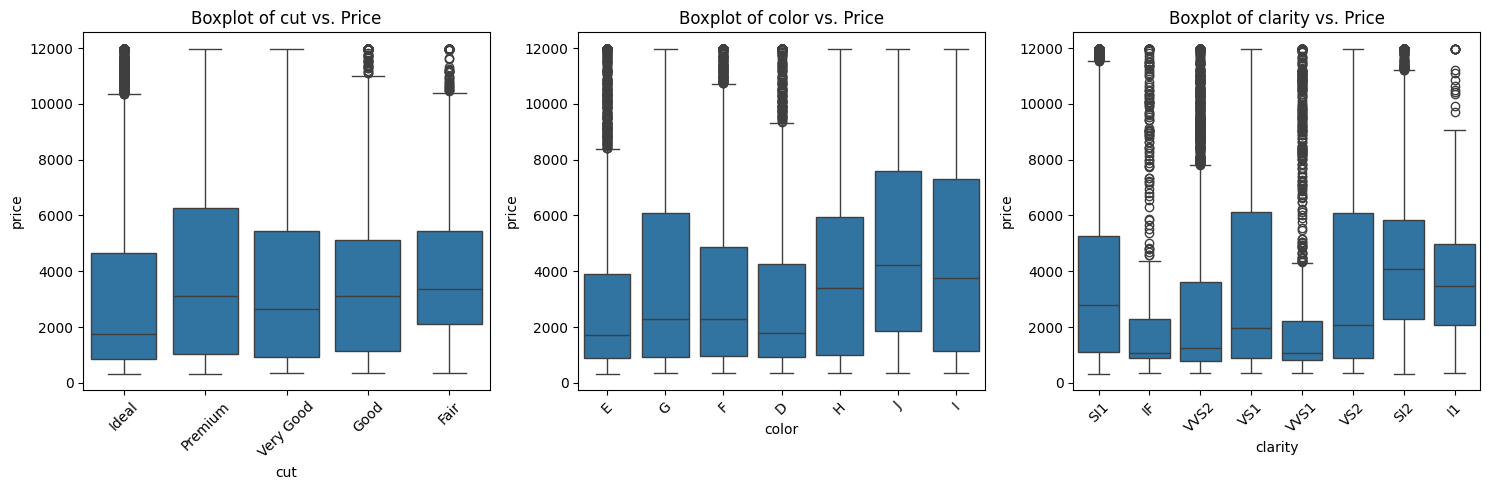

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(15, 10))

# Scatter plots for numerical features vs. price
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs. Price')
plt.tight_layout()
plt.show()


# Boxplots for categorical features vs. price
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], y=df['price'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} vs. Price')

plt.tight_layout()
plt.show()


In [ ]:
df.corr(numeric_only=True)

carat     depth     table         x         y         z     price
carat  1.000000  0.029528  0.187395  0.982207  0.981285  0.977328  0.936741
depth  0.029528  1.000000 -0.289564 -0.019937 -0.022966  0.095160 -0.000789
table  0.187395 -0.289564  1.000000  0.199146  0.193530  0.159425  0.137971
x      0.982207 -0.019937  0.199146  1.000000  0.998495  0.988179  0.912759
y      0.981285 -0.022966  0.193530  0.998495  1.000000  0.987853  0.914191
z      0.977328  0.095160  0.159425  0.988179  0.987853  1.000000  0.905737
price  0.936741 -0.000789  0.137971  0.912759  0.914191  0.905737  1.000000

heatmap colour pallete : https://seaborn.pydata.org/tutorial/color_palettes.html

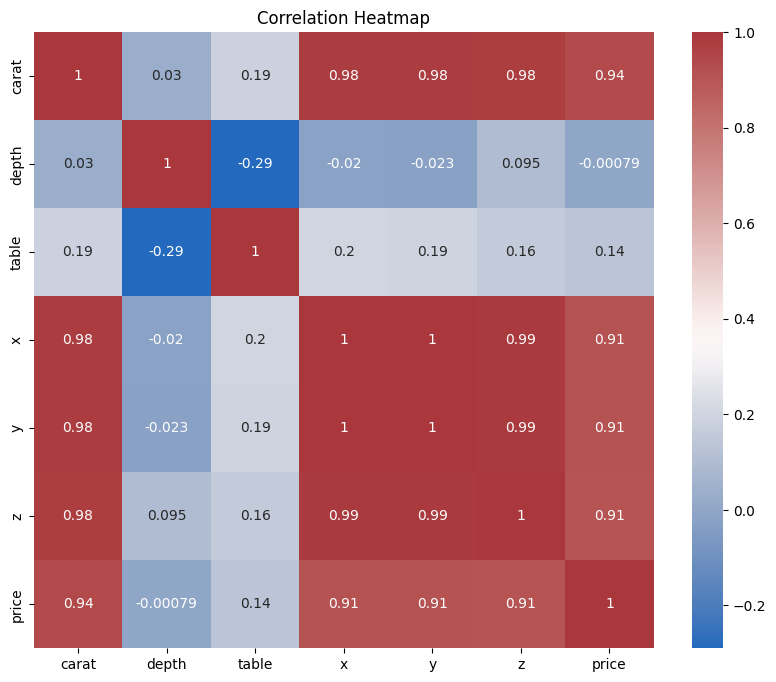

In [ ]:
# correlation  between any two variables'coolwarm'
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="vlag")
plt.title('Correlation Heatmap')
plt.show()

**Reasoning**:
Bivariate analysis is complete. Now, I will perform multivariate analysis and then encode categorical features.



In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

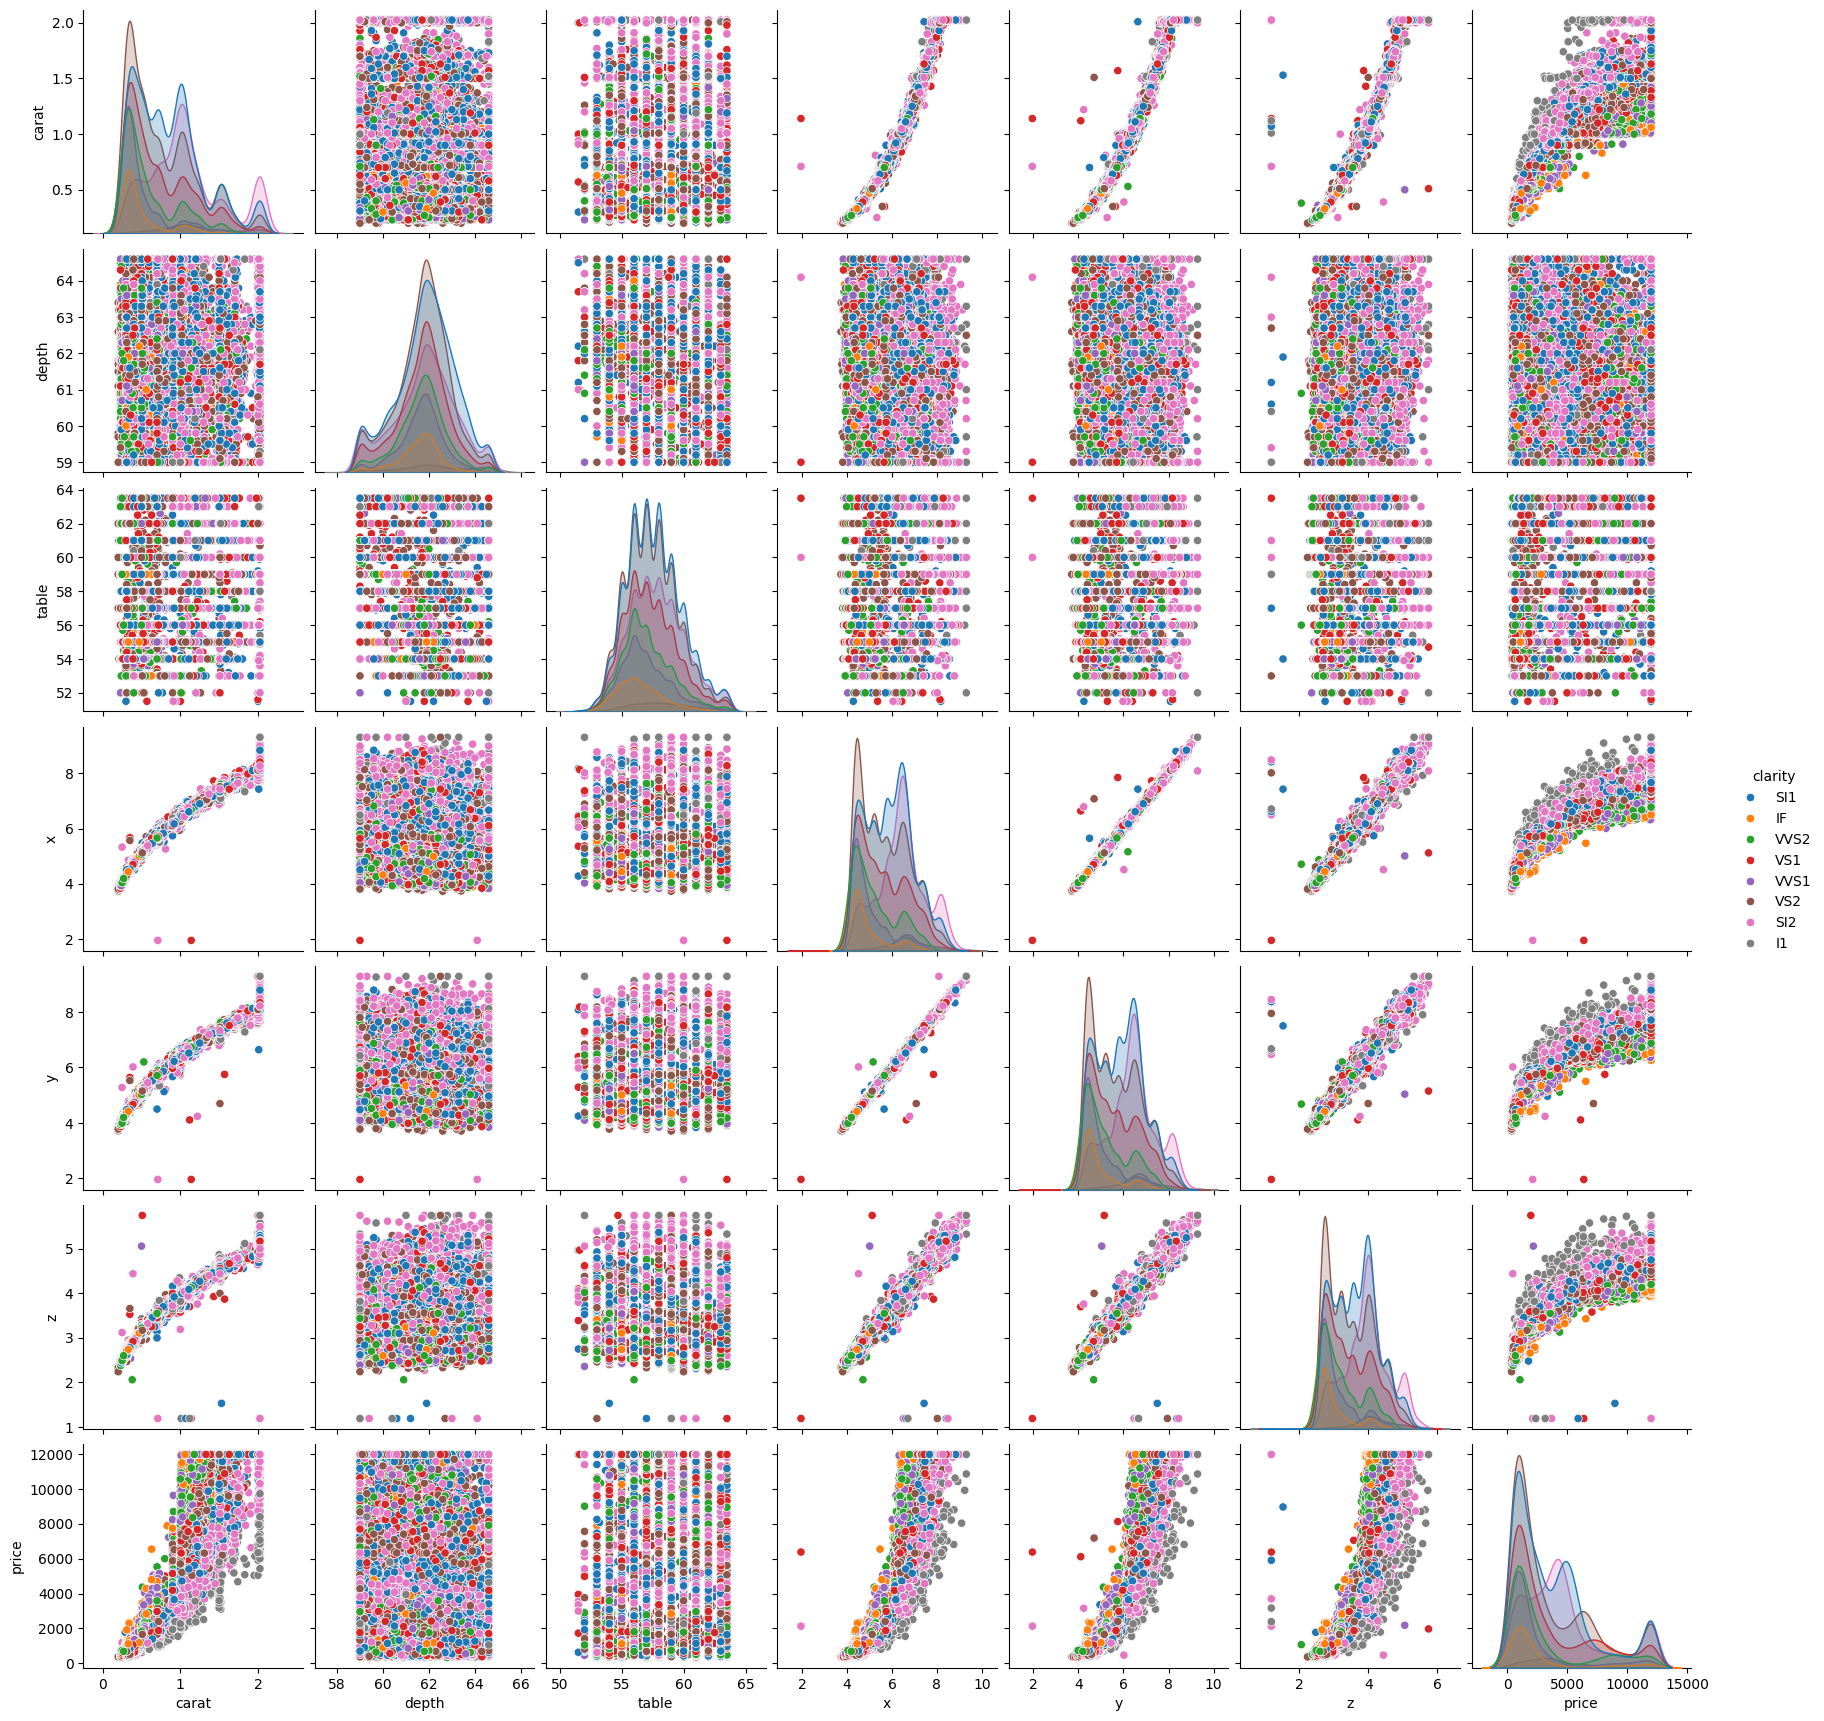

In [ ]:
# Multivariate Analysis: Pairplot
sns.pairplot(df, hue='clarity') #hues are categorical column
plt.show()



In [ ]:
# Encode categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)
display(df.head())

KeyError: "None of [Index(['cut', 'color', 'clarity'], dtype='object')] are in the [columns]"

This image is a pairplot, a type of multivariate visualization that helps explore relationships between multiple variables in a dataset. In this case, the dataset seems to involve features of diamonds (based on the feature names like "carat", "depth", "price", etc.). Here's a detailed breakdown of the components:

1. Scatterplots (Lower Triangle)
These plots display the relationship between pairs of numerical features.

Each point in the scatterplot represents an observation (or data point). The color of the point indicates the category or class to which it belongs. For example, in a dataset about diamonds, the color could represent different cuts of diamonds like 'Ideal', 'Premium', etc.

These scatterplots allow us to quickly understand if two variables are related, and in what way. For example:

Carat vs. Price: As the carat increases, the price of the diamond might increase. This relationship is often a positive correlation.

Depth vs. Table: These features might show a specific pattern if diamonds with certain characteristics are concentrated in specific regions of the plot.

2. Diagonal Histograms (or KDE plots)
These plots show the distribution of individual features. On the diagonal of the pairplot, you'll see either histograms or Kernel Density Estimations (KDEs). The diagonal helps you understand the spread and density of each feature's values.

Price Distribution: You may see how prices are distributed across diamonds. Is it skewed? Are most diamonds priced similarly or is there a wide range?

Carat Distribution: You can see if most diamonds are of a similar carat weight, or if there's a heavy concentration of larger or smaller diamonds.

Density: The KDE curve smooths out the histogram and gives a more continuous view of the distribution. For example, if you have a large concentration of diamonds in the 1-2 carat range, you'll see a high density at that point.

3. Feature Relationships
This is where multivariate analysis really shines. By visualizing the relationships between multiple variables at once, you can identify several things:

Correlations: Some features are strongly correlated with each other. For example, carat and price are often positively correlated: as the carat weight increases, so does the price.

Non-linear Relationships: Sometimes the relationship isn't linear. For instance, depth and table might have a non-linear correlation (e.g., values might increase together but at different rates).

Clusters or Groupings: You might spot clusters or patterns where certain categories (based on color, clarity, cut, etc.) cluster together, even if the features themselves seem different.

4. Color-Coding
The color in the plots is usually used to represent categorical variables. In the case of diamonds, categories could be related to things like:

Cut Quality (Ideal, Premium, Very Good, etc.)

Color Grade (e.g., D, E, F, G, etc.)

Clarity (VS1, SI1, etc.)

Color coding helps you see how these categorical labels interact with continuous features like price, carat, or depth. For instance:

Are diamonds of a particular cut more expensive on average?

Do certain clarity grades tend to show more variation in price or carat?

Why is Multivariate Analysis Necessary?
Multivariate analysis helps in making sense of complex datasets with multiple variables (features). While individual univariate analysis (looking at one variable at a time) provides some insights, it doesn't tell us how variables interact or influence each other. Here's why it's important:

1. Identify Correlations:
In most real-world datasets, variables don't operate independently. For example, in a dataset like this (about diamonds), carat and price are usually correlated. But is depth correlated with price? A pairplot shows this quickly.

Knowing these relationships allows you to make better predictions. For example, if you're building a regression model to predict price, knowing that carat has a strong relationship with price can help you choose the most relevant features for your model.

2. Spot Multicollinearity:
In predictive modeling, multicollinearity occurs when two or more predictor variables (features) are highly correlated with each other. This can make your model unstable or inaccurate. A scatterplot matrix allows you to visually spot highly correlated features so you can decide whether to remove or combine them before building a model.

3. Visualizing Complex Interactions:
Sometimes, features may not show strong relationships when viewed individually but might interact in more complex ways. For example, a diamond's cut may not correlate directly with price, but when combined with carat and clarity, the relationship might become more apparent. This is important for understanding higher-order interactions in the data.

4. Handling High-Dimensional Data:
When you have many features, the relationships between them become hard to manage. Multivariate analysis helps summarize and visualize these relationships, even if there are dozens of features. Techniques like PCA (Principal Component Analysis) or t-SNE can be used to reduce dimensionality and make the data easier to analyze, which is often a precursor to machine learning.

5. Choosing the Right Features:
Through multivariate analysis, you can also understand which features are more important for your analysis or predictive modeling. Features that show weak or no relationships with the target variable (like price) can often be dropped to simplify the model.

In Summary
Multivariate analysis allows you to better understand how multiple features relate to each other in your dataset.

Pairplots are a great tool for this as they display correlations, distributions, and complex interactions between features visually.

Understanding the relationships between variables helps in choosing the right features for predictive modeling, managing multicollinearity, and ensuring the model is interpretable and accurate.

It's an essential step for working with complex datasets like the one shown here, where multiple variables impact each other and the outcome variable (like price).

In [ ]:


# 1. Binning the 'carat' column into categories (small, medium, large)
bins = [0, 0.5, 1.0, float('inf')]
labels = ['Small', 'Medium', 'Large']
df['carat_bin'] = pd.cut(df['carat'], bins=bins, labels=labels, right=False)

# 2. Grouping by 'cut' to find the average price for each cut type
avg_price_by_cut = df.groupby('cut')['price'].mean()

# 3. Grouping by 'clarity' and 'cut' to find the average price for each combination
avg_price_by_clarity_cut = df.groupby(['clarity', 'cut'])['price'].mean()

# 4. Finding the distribution of 'price' for different 'color' categories using bins
price_bins = [0, 500, 1500, 5000, float('inf')]
price_labels = ['Low', 'Medium', 'High', 'Very High']
df['price_bin'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)
price_distribution_by_color = df.groupby(['color', 'price_bin']).size()

# 5. Applying a 'groupby' operation on the 'cut' column to find the median of 'depth' for each cut type
median_depth_by_cut = df.groupby('cut')['depth'].median()

# Displaying the results
print("Average Price by Cut:")
print(avg_price_by_cut)
print("\nAverage Price by Clarity and Cut:")
print(avg_price_by_clarity_cut)
print("\nPrice Distribution by Color:")
print(price_distribution_by_color)
print("\nMedian Depth by Cut:")
print(median_depth_by_cut)

# Optional: View the binning applied
print("\nBinned Carat and Price Data:")
print(df[['carat', 'carat_bin', 'price', 'price_bin']].head())


Average Price by Cut:
cut
Fair         4377.907810
Good         3773.801721
Ideal        3282.754993
Premium      4284.055443
Very Good    3832.066003
Name: price, dtype: float64

Average Price by Clarity and Cut:
clarity  cut      
I1       Fair         3436.168539
         Good         3804.137255
         Ideal        3941.425676
         Premium      4008.435185
         Very Good    4147.174419
IF       Fair         1995.750000
         Good         3477.433333
         Ideal        2084.031811
         Premium      3385.921739
         Very Good    4051.700758
SI1      Fair         4087.297927
         Good         3571.411765
         Ideal        3529.734651
         Premium      4197.991985
         Very Good    3844.532950
SI2      Fair         5314.571111
         Good         4178.382075
         Ideal        4447.770015
         Premium      5138.513112
         Very Good    4746.587393
VS1      Fair         4355.263441
         Good         3730.228097
         Ideal     

<ipython-input-28-4f45a70a6378>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_distribution_by_color = df.groupby(['color', 'price_bin']).size()


In [ ]:
avg_price_by_cut = df.groupby('cut')['price'].mean()

avg_price_by_cut

cut
Fair         4377.907810
Good         3773.801721
Ideal        3282.754993
Premium      4284.055443
Very Good    3832.066003
Name: price, dtype: float64

In [ ]:
# group the data by clarity, average depth
avg_depth_by_clarity = df.groupby('clarity')['depth'].size() # categorical column
avg_depth_by_clarity.sort_values() #lowest to highest

clarity
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: depth, dtype: int64

In [ ]:
df['clarity'].value_counts().sort_values()

clarity
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: count, dtype: int64

In [ ]:
df.groupby('cut')['depth'].agg(['max', 'min',"mean","median","std","sum"])

max   min       mean  median       std       sum
cut                                                         
Fair       64.6  59.0  63.326889    64.6  2.141679   49458.3
Good       64.6  59.0  62.477345    63.3  1.807985  152507.2
Ideal      64.6  59.0  61.708238    61.8  0.696227  667436.3
Premium    63.0  59.0  61.301899    61.5  1.094917  422921.8
Very Good  64.6  59.0  61.841161    62.1  1.307857  372902.2

In [ ]:
df.groupby('cut')['depth'].max()

cut
Fair         64.6
Good         64.6
Ideal        64.6
Premium      63.0
Very Good    64.6
Name: depth, dtype: float64

In [ ]:
df.groupby('cut')['depth'].min()

cut
Fair         59.0
Good         59.0
Ideal        59.0
Premium      59.0
Very Good    59.0
Name: depth, dtype: float64

In [ ]:
# 3. Grouping by 'clarity' and 'cut' to find the average price for each combination
avg_price_by_clarity_cut = df.groupby(['cut','clarity'])['price'].sum()
avg_price_by_clarity_cut

cut        clarity
Fair       I1          305819.0
           IF            7983.0
           SI1         788848.5
           SI2        1195778.5
           VS1         405039.5
           VS2         563572.5
           VVS1         29107.5
           VVS2        122997.5
Good       I1          194011.0
           IF          104323.0
           SI1        2732130.0
           SI2        2214542.5
           VS1        1234705.5
           VS2        2071653.0
           VVS1        237850.0
           VVS2        422635.0
Ideal      I1          291665.5
           IF         1277511.5
           SI1        7588929.5
           SI2        5888847.5
           VS1        5944754.0
           VS2        8000514.5
           VVS1       2406622.5
           VVS2       4107433.0
Premium    I1          432911.0
           IF          389381.0
           SI1        7594167.5
           SI2        7445705.5
           VS1        4116122.0
           VS2        7180363.0
           VVS1        833833.5
           VVS2       1563215.0
Very Good  I1          178328.5
           IF          534824.5
           SI1        6358857.5
           SI2        4969677.0
           VS1        3252703.5
           VS2        5059173.0
           VVS1        951423.5
           VVS2       1802370.5
Name: price, dtype: float64

In [ ]:
df['cut'].isin(['Ideal', 'Premium']) #or and combining cut-== ideal or cut== premium

0         True
1         True
2        False
3         True
4         True
         ...  
26962     True
26963     True
26964     True
26965    False
26966     True
Name: cut, Length: 26967, dtype: bool

In [ ]:
count_by_color_cut = df[df['cut'].isin(['Ideal', 'Premium'])].groupby('color').size()
count_by_color_cut

color
D    2217
E    3140
F    3060
G    3941
H    2713
I    1784
J     860
dtype: int64

In [ ]:
df['carat'].describe()

count    26967.000000
mean         0.793593
std          0.462431
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          2.025000
Name: carat, dtype: float64

In [ ]:



# 1. Binning the 'carat' column into categories (small, medium, large)


df['carat_bin'] = pd.cut(df['carat'], bins=[0, 0.5, 1.0,2.0], labels=['Small', 'Medium', 'Large'])
#above 0 to .5

#.51- 1.0
#1.11-- 2
df[["carat",'carat_bin']]

carat carat_bin
0       0.30     Small
1       0.33     Small
2       0.90    Medium
3       0.42     Small
4       0.31     Small
...      ...       ...
26962   1.11     Large
26963   0.33     Small
26964   0.51    Medium
26965   0.27     Small
26966   1.25     Large

[26967 rows x 2 columns]

In [ ]:
df['carat_bin'].value_counts()

carat_bin
Small     9582
Medium    8581
Large     7829
Name: count, dtype: int64

In [ ]:
import pandas as pd



# 1. Find the total number of diamonds for each clarity level.
total_by_clarity = df.groupby('clarity').size()

# 2. Find the average carat weight for each cut type.
avg_carat_by_cut = df.groupby('cut')['carat'].mean()

# 3. What is the median price for diamonds with different color ratings?
median_price_by_color = df.groupby('color')['price'].median()

# 4. Group diamonds by 'cut' and calculate the standard deviation of 'depth' for each cut.
std_depth_by_cut = df.groupby('cut')['depth'].std()

# 5. Find the maximum and minimum price for each carat bin (small, medium, large).
max_min_price_by_carat_bin = df.groupby('carat_bin')['price'].agg(['max', 'min'])

# 6. What is the average depth for diamonds with clarity ratings of 'VS1' and 'SI1'?
avg_depth_vs1_si1 = df[df['clarity'].isin(['VS1', 'SI1'])].groupby('clarity')['depth'].mean()

# 7. Group by 'color' and find the count of diamonds with 'Ideal' and 'Premium' cuts.
count_by_color_cut = df[df['cut'].isin(['Ideal', 'Premium'])].groupby('color').size()

# 8. For each cut type, calculate the price range (max price - min price).
price_range_by_cut = df.groupby('cut')['price'].agg(lambda x: x.max() - x.min())

# 9. Determine the average table percentage for each clarity level.
avg_table_by_clarity = df.groupby('clarity')['table'].mean()

# 10. Create bins for 'depth' into categories (low, medium, high) and find the average price within each bin.
depth_bins = [0, 60, 62, 64, float('inf')]
depth_labels = ['Low', 'Medium', 'High', 'Very High']
df['depth_bin'] = pd.cut(df['depth'], bins=depth_bins, labels=depth_labels, right=False)
avg_price_by_depth_bin = df.groupby('depth_bin')['price'].mean()

# Displaying the results
print("Total Diamonds by Clarity:")
print(total_by_clarity)

print("\nAverage Carat Weight by Cut:")
print(avg_carat_by_cut)

print("\nMedian Price by Color:")
print(median_price_by_color)

print("\nStandard Deviation of Depth by Cut:")
print(std_depth_by_cut)

print("\nMax and Min Price by Carat Bin:")
print(max_min_price_by_carat_bin)

print("\nAverage Depth for VS1 and SI1 Clarity:")
print(avg_depth_vs1_si1)

print("\nCount of Diamonds with 'Ideal' and 'Premium' Cuts by Color:")
print(count_by_color_cut)

print("\nPrice Range by Cut:")
print(price_range_by_cut)

print("\nAverage Table Percentage by Clarity:")
print(avg_table_by_clarity)

print("\nAverage Price by Depth Bin:")
print(avg_price_by_depth_bin)


Total Diamonds by Clarity:
clarity
I1       365
IF       894
SI1     6571
SI2     4575
VS1     4093
VS2     6099
VVS1    1839
VVS2    2531
dtype: int64

Average Carat Weight by Cut:
cut
Fair         1.046172
Good         0.846192
Ideal        0.698278
Premium      0.881667
Very Good    0.809785
Name: carat, dtype: float64

Median Price by Color:
color
D    1800.5
E    1698.0
F    2278.0
G    2274.0
H    3413.0
I    3749.0
J    4234.0
Name: price, dtype: float64

Standard Deviation of Depth by Cut:
cut
Fair         2.141679
Good         1.807985
Ideal        0.696227
Premium      1.094917
Very Good    1.307857
Name: depth, dtype: float64

Max and Min Price by Carat Bin:
               max     min
carat_bin                 
Small       2677.0   326.0
Medium      9636.0   613.0
Large      11982.5  1805.0

Average Depth for VS1 and SI1 Clarity:
clarity
SI1    61.857571
VS1    61.681114
Name: depth, dtype: float64

Count of Diamonds with 'Ideal' and 'Premium' Cuts by Color:
color
D    2217


<ipython-input-29-881b9e9974d6>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_min_price_by_carat_bin = df.groupby('carat_bin')['price'].agg(['max', 'min'])
<ipython-input-29-881b9e9974d6>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_depth_bin = df.groupby('depth_bin')['price'].mean()


**Reasoning**:
The categorical features are encoded.  The next step is to standardize and normalize the numerical features.



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Normalize numerical features
normalizer = MinMaxScaler()
df[numerical_cols] = normalizer.fit_transform(df[numerical_cols])

display(df.head())

Unnamed: 0     carat     depth     table         x         y         z  \
0           1  0.054795  0.553571  0.541667  0.315217  0.317623  0.322368   
1           2  0.071233  0.321429  0.541667  0.335598  0.340847  0.331140   
2           3  0.383562  0.571429  0.708333  0.555707  0.567623  0.567982   
3           4  0.120548  0.464286  0.375000  0.389946  0.387295  0.388158   
4           5  0.060274  0.250000  0.625000  0.326087  0.336749  0.320175   

      price  cut_Good  cut_Ideal  ...  color_H  color_I  color_J  clarity_IF  \
0  0.014842     False       True  ...    False    False    False       False   
1  0.056449     False      False  ...    False    False    False        True   
2  0.511560     False      False  ...    False    False    False       False   
3  0.064857     False       True  ...    False    False    False       False   
4  0.038862     False       True  ...    False    False    False       False   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0         True        False        False        False         False   
1        False        False        False        False         False   
2        False        False        False        False         False   
3        False        False         True        False         False   
4        False        False        False        False          True   

   clarity_VVS2  
0         False  
1         False  
2          True  
3         False  
4         False  

[5 rows x 25 columns]

## Summary:

### Q&A

There are no explicit questions in the provided data analysis task and its solution.  However, we can infer some implicit questions the analysis attempts to address:

* **Are there missing values, duplicates, and outliers in the dataset?** Yes, missing values were found in the 'depth' column, no duplicates were detected and outliers were present in several numerical features.
* **How are the features distributed?**  Univariate analysis (histograms, boxplots, and countplots) helps visualize the distribution of individual features.
* **What are the relationships between features and the target variable ('price')?** Bivariate analysis using scatterplots and boxplots explores the relationships between features and 'price'.
* **How do multiple features interact with each other?**  The pairplot provides insights into multivariate relationships.
* **How can categorical features be used in modeling?**  One-hot encoding transforms categorical variables into a numerical format suitable for machine learning.
* **Should the data be scaled?**  Standardization and normalization prepares the numerical features for models sensitive to feature scales.

### Data Analysis Key Findings

* **Missing Values:** 697 missing values were found in the 'depth' column and were imputed using the median.
* **Outliers:** Outliers were present in multiple numerical columns ('carat', 'depth', 'table', 'x', 'y', 'z', 'price').  Rather than removal, the outliers were capped at the upper and lower bounds determined by the IQR method.
* **No Duplicates:** No duplicate rows were found in the dataset.
* **Feature Distributions:**  Univariate analysis revealed the distributions of numerical and categorical features.  Boxplots indicated potential outliers prior to capping.
* **Feature Relationships with Price:** Bivariate analysis revealed relationships between features and the 'price' target variable.  
* **Multivariate Relationships:** Pairplots illustrated complex interactions between multiple features.
* **Data Transformation:** Categorical features were one-hot encoded, and numerical features were standardized and normalized.

### Insights or Next Steps

* **Feature Engineering:** Explore further feature engineering based on the relationships observed in the bivariate and multivariate analyses.  For instance, consider creating interaction terms or polynomial features.
* **Model Building:** Proceed to build predictive models using the cleaned and preprocessed data. Start with linear regression or tree-based models, given the nature of the dataset and the target variable.  Evaluate multiple models using appropriate metrics (e.g., R-squared, RMSE).
